Image dimensions: (1200, 1920, 3)


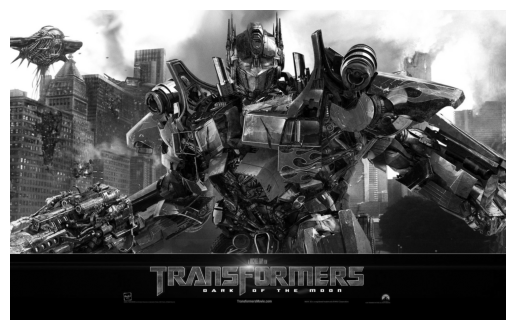

In [1]:
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
img = mpimg.imread('optimumprime.jpg')
print('Image dimensions:', img.shape)
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
gray = rgb2gray(img)
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.axis('off')  
plt.show()

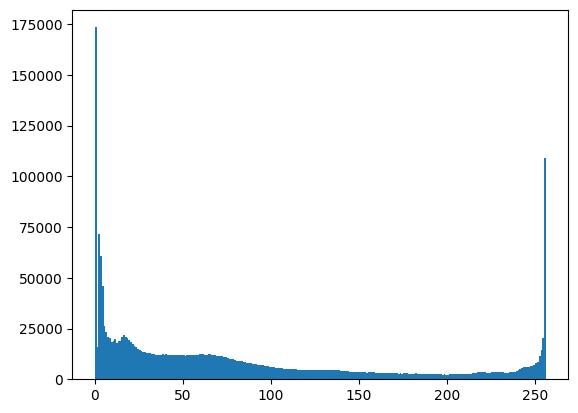

In [ ]:
import cv2
from matplotlib import pyplot as plt
image = cv2.imread('optimumprime.jpg',cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image],[0],None,[256],[0,256])
plt.hist(image.ravel(), bins=256, range=(0, 256))
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

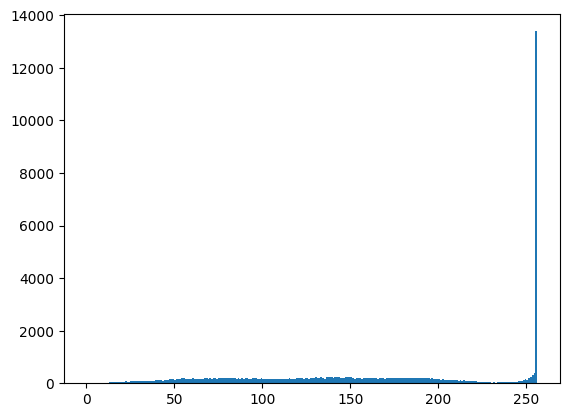

In [3]:
import cv2
from matplotlib import pyplot as plt
image = cv2.imread('cat.jpeg',cv2.IMREAD_GRAYSCALE)
hist = cv2.calcHist([image],[0],None,[256],[0,256])
cv2.imshow('Image', image)
plt.hist(image.ravel(), bins=256, range=(0, 256))
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

<BarContainer object of 256 artists>

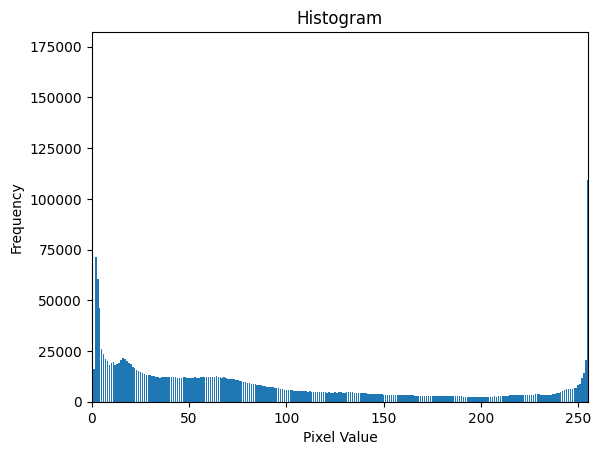

In [ ]:
histogram = [0] * 256
for row in image:
    for pixel in row:
        histogram[pixel] += 1
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 255])
plt.bar(range(0,256),histogram)


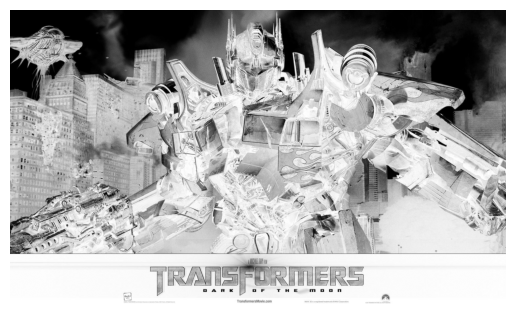

<BarContainer object of 256 artists>

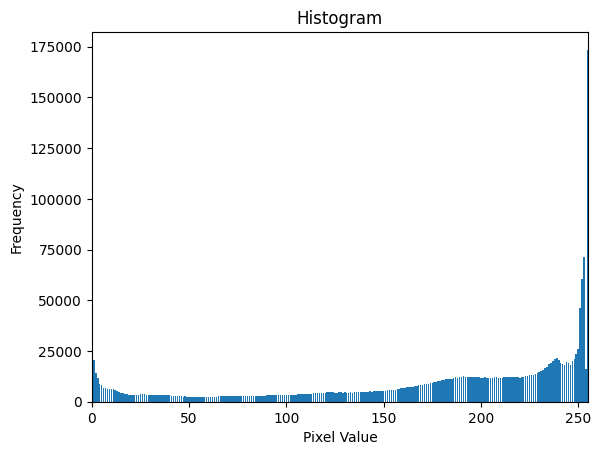

In [13]:
import cv2
from matplotlib import pyplot as plt
image = cv2.imread('optimumprime.jpg',cv2.IMREAD_GRAYSCALE)
negative = 255 - image
histogram = [0] * 256
for row in negative:
    for pixel in row:
        histogram[pixel] += 1
plt.imshow(negative, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xlim([0, 255])
plt.bar(range(0,256),histogram)

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
image = cv2.imread('optimumprime.jpg',cv2.IMREAD_GRAYSCALE)
height, width = image.shape

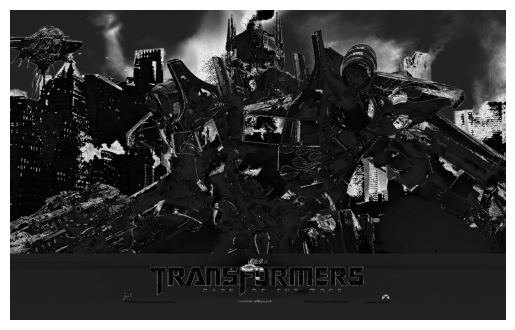

In [14]:
#Negative image
def T(r):
    s = 255 - r
    return s

for i in range(height):
    for j in range(width):
        image[i][j] = T(image[i][j])
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.axis('off')  
plt.show()

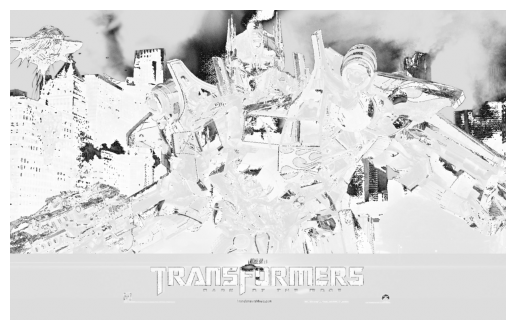

In [13]:
#Gray level slicing
def T(r):
    if 50 <= r <= 100:
        r = 220
    return r

for i in range(height):
    for j in range(width):
        image[i][j] = T(image[i][j])
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.axis('off')  
plt.show()

/tmp/ipykernel_13479/1813180439.py:5: RuntimeWarning: overflow encountered in scalar subtract
  s = 255/(1+np.exp(-k*(r-r0)))


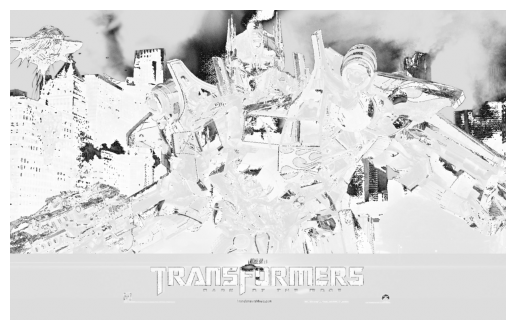

In [12]:
#sigmoid function
def T(r):
    k = 0.02
    r0 = 128
    s = 255/(1+np.exp(-k*(r-r0)))
    return int(s)

for i in range(height):
    for j in range(width):
        image[i][j] = T(image[i][j])
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.axis('off')  
plt.show()

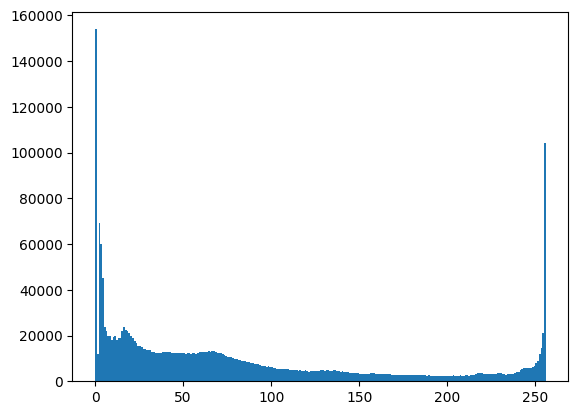

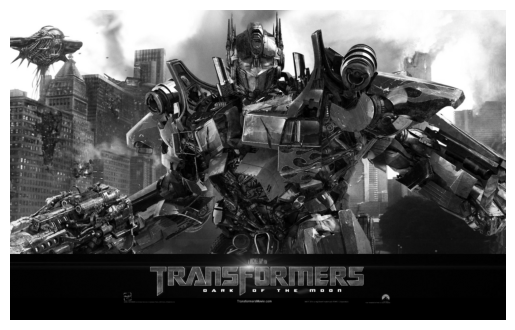

In [ ]:
#neigbors max min
output = image.copy()
for y in range(1, height - 1):
    for x in range(1, width - 1):
        neighbors = [
            image[y-1, x-1], image[y-1, x], image[y-1, x+1],
            image[y,   x-1], image[y,   x], image[y,   x+1],
            image[y+1, x-1], image[y+1, x], image[y+1, x+1]
        ]
        output[y, x] = min(neighbors)

hist = cv2.calcHist([output],[0],None,[256],[0,256])
plt.hist(output.ravel(), bins=256, range=(0, 256))
plt.show()
plt.imshow(output, cmap=plt.get_cmap('gray'))
plt.axis('off')  
plt.show()
#brighter or darker but less detail

180


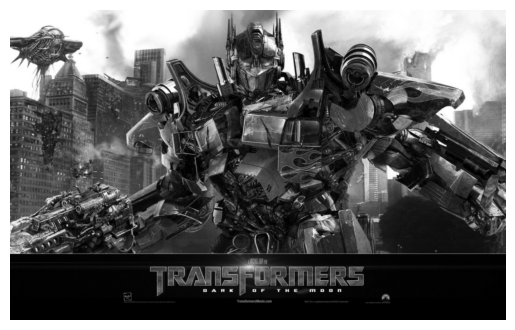

In [ ]:
weight = [[1, 2, 4, 2, 1],
          [2, 4, 16, 4, 2],
          [4, 16, 64, 16, 4],
          [2, 4, 16, 4, 2],
          [1, 2, 4, 2, 1]
]
weightsum = 0
for row in weight:
    weightsum += sum(row)
output = image.copy()
for y in range(2, height - 2):
    for x in range(2, width - 2):
        s = 0
        for j in range (5):
            for i in range (5):
                pixel = int(image[y + j - 2, x + i - 2])
                s += pixel*weight[j][i]
        average = s // weightsum
        output[y, x] = np.clip(average, 0, 255)
plt.imshow(output, cmap=plt.get_cmap('gray'))
plt.axis('off')  
plt.show()

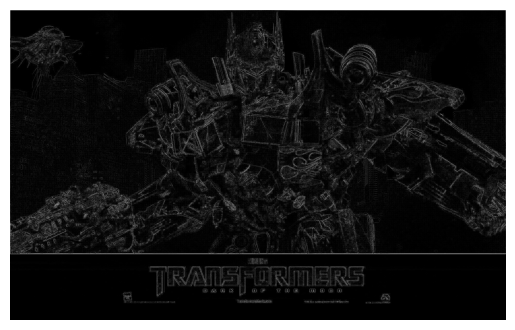

In [3]:
weight = [[0,  1, 0],
          [1, -4, 1],
          [0,  1, 0]
]
weightsum = 0
for row in weight:
    weightsum += sum(row)
output = image.copy()
for y in range(1, height - 1):
    for x in range(1, width - 1):
        s = 0
        for j in range (3):
            for i in range (3):
                pixel = int(image[y + j - 1, x + i - 1])
                s += pixel*weight[j][i]
        grey = s 
        output[y, x] = np.clip(grey, 0, 255)
plt.imshow(output, cmap=plt.get_cmap('gray'))
plt.axis('off')  
plt.show()

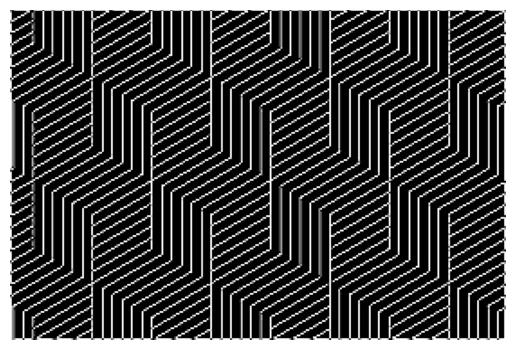

In [ ]:
line_image = cv2.imread('line.png',cv2.IMREAD_GRAYSCALE)
height, width = line_image.shape
output = line_image.copy()
weight = [[0,  1, 0],
          [1, -4, 1],
          [0,  1, 0]
]
weightsum = 0
for row in weight:
    weightsum += sum(row)
for y in range(1, height - 1):
    for x in range(1, width - 1):
        s = 0
        for j in range (3):
            for i in range (3):
                pixel = int(line_image[y + j - 1, x + i - 1])
                s += pixel*weight[j][i]
        grey = s 
        output[y, x] = np.clip(grey, 0, 255)
plt.imshow(output, cmap=plt.get_cmap('gray'))
plt.axis('off')  
plt.show()

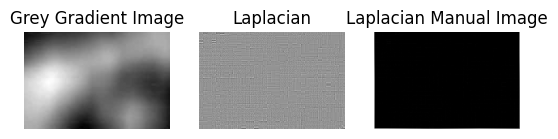

In [ ]:
gradient_image = cv2.imread('gradient.jpeg',cv2.IMREAD_GRAYSCALE)
height, width = gradient_image.shape
output = gradient_image.copy()
weight = [[0,  1, 0],
          [1, -4, 1],
          [0,  1, 0]
]
weightsum = 0
for row in weight:
    weightsum += sum(row)
for y in range(1, height - 1):
    for x in range(1, width - 1):
        s = 0
        for j in range (3):
            for i in range (3):
                pixel = int(gradient_image[y + j - 1, x + i - 1])
                s += pixel*weight[j][i]
        grey = s 
        output[y, x] = np.clip(grey, 0, 255)

laplacian = cv2.Laplacian(gradient_image, cv2.CV_64F)
plt.subplot(1, 3, 1)
plt.title('Grey Gradient Image')
plt.imshow(gradient_image, cmap=plt.get_cmap('gray'))  
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Laplacian cv2')
plt.imshow(laplacian, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Laplacian Manual Image')
plt.imshow(output, cmap=plt.get_cmap('gray'))
plt.axis('off')  
plt.show()

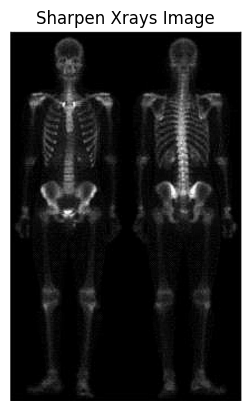

In [ ]:
xrays_image = cv2.imread('xrays.png',cv2.IMREAD_GRAYSCALE)
height, width = xrays_image.shape
outputd = xrays_image.copy()
#Sharpening
weight2 = [[-1,-1,-1],
           [-1, 9,-1],
           [-1,-1,-1]
]
for y in range(1, height - 1):
    for x in range(1, width - 1):
        s = 0
        for j in range (3):
            for i in range (3):
                pixel = int(xrays_image[y + j - 1, x + i - 1])
                s += pixel*weight2[j][i]
        grey = s 
        outputd[y, x] = np.clip(grey, 0, 255)
plt.title('Sharpen Xrays Image')
plt.imshow(outputd, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()

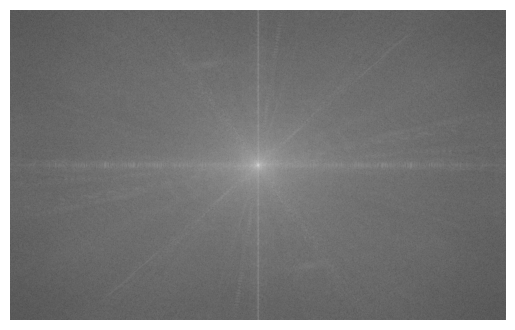

In [17]:
FT=np.fft.fft2(image)
FT_shift = np.fft.fftshift(FT)
freqimg = 20*np.log(np.abs(FT_shift)) #magnitude spectrum
plt.imshow(freqimg,cmap="gray")
plt.axis('off')
plt.show()
plt.imsave("freqimg.jpg",freqimg,cmap="gray")

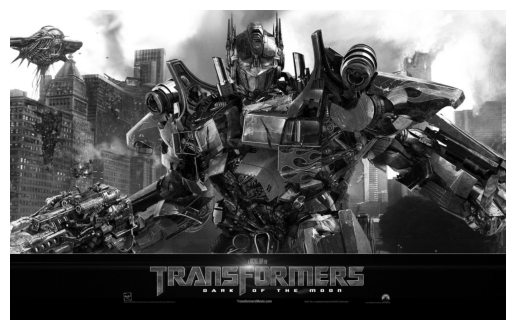

In [ ]:
magnitude_spectrum = np.abs(FT)
phase_spectrum = np.angle(FT)
reconstructed_spectrum = magnitude_spectrum * np.exp(1j * phase_spectrum)
FT_inverse = np.fft.ifftshift(reconstructed_spectrum)
image_back = np.fft.ifft2(FT_inverse)
image_back = np.abs(image_back)
plt.imshow(image_back,cmap="gray")
plt.axis('off')
plt.show()

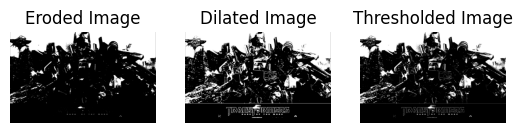

In [6]:
def thresholding(image, threshold):
    for i in range(height):
        for j in range(width):
            if image[i][j] < threshold:
                image[i][j] = 0
            else:
                image[i][j] = 255
    return image
threshold = 128
thresholded_image = thresholding(image.copy(), threshold)

# Define the structuring element (kernel)
struct_element = np.array([
    [0, 1, 0],
    [1, 1, 1],
    [0, 1, 0]
])

def erode(image, kernel):
    height, width = image.shape
    output = np.zeros((height, width), dtype=np.uint8)
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            window = image[i-1:i+2, j-1:j+2]
            # Check if all pixels under the kernel's 1s are 255
            if np.all(window[kernel == 1] == 255):
                output[i,j] = 255
    return output

def dilate(image, kernel):
    height, width = image.shape
    output = np.zeros((height, width), dtype=np.uint8)
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            window = image[i-1:i+2, j-1:j+2]
            # Check if any pixels under the kernel's 1s are 255
            if np.any(window[kernel == 1] == 255):
                output[i,j] = 255
    return output

# Apply the morphological operations
eroded_image = erode(thresholded_image, struct_element)
dilated_image = dilate(thresholded_image, struct_element)

plt.subplot(1, 3, 1)
plt.title('Eroded Image')
plt.imshow(eroded_image, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title('Dilated Image')
plt.imshow(dilated_image, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title('Thresholded Image')
plt.imshow(thresholded_image, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()